# **Credit Risk Prediction Project**

## **Author: Fahim Shahriar**
### Github: https://github.com/FahimS45

### Dataset description: https://www.kaggle.com/competitions/GiveMeSomeCredit
### Dataset link: https://www.kaggle.com/competitions/GiveMeSomeCredit

We have conducted two experiments in this project using advanced data preprocessing and class balancing techniques. Based on these experiments, we have selected six machine learning models to evaluate their performance in predicting credit risk.

- **Logistic Regression**
- **Random Forest**
- **XGBoost**
- **LightGBM**
- **Ada Boost**
- **Artificial Neural Network (ANN)**

In future experiments, we aim to fine-tune these models, explore ensemble methods, and optimize for production deployment.


In [1]:
!pip install imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [20]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [2]:
import xgboost
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)
print("XGboost version:", xgboost.__version__)

scikit-learn version: 1.2.2
imbalanced-learn version: 0.10.1
XGboost version: 2.0.3


In [28]:
# Load the dataset
df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)  # Drop index column

# Rename target for readability
df.rename(columns={"SeriousDlqin2yrs": "Default"}, inplace=True)

# Quick overview
df.head()

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [29]:
for each in df.columns:
    print(each)

Default
RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [30]:
df['Default'].value_counts()

Default
0    139974
1     10026
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Default                               150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Default,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [33]:
specified_rows = df[df['age']==109.0]
specified_rows

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
105790,0,0.109307,109,0,2141.0,NaN,17,0,1,0,NaN
138291,0,0.246529,109,0,318.0,NaN,3,0,0,0,NaN


In [34]:
df.isnull().sum()

Default                                     0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [35]:
df.dtypes

Default                                   int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [36]:
# Make a copy so original is untouched
df_dropna = df.dropna()

In [37]:
print(f"Original shape: {df.shape}")
print(f"After dropping missing: {df_dropna.shape}")

Original shape: (150000, 11)
After dropping missing: (120269, 11)


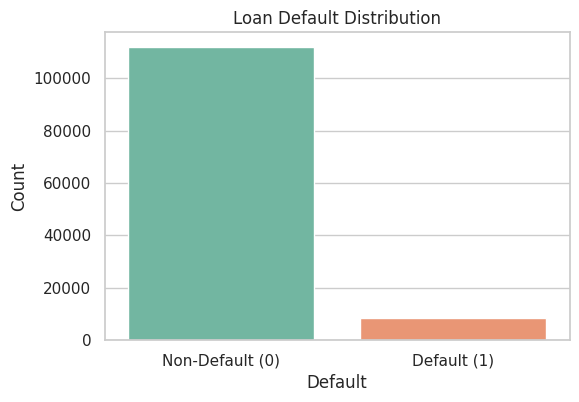

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_dropna, x='Default', palette='Set2')
plt.title('Loan Default Distribution')
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'])
plt.ylabel('Count')
plt.show()


In [39]:
df_dropna

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# Exploratory Data Analysis (EDA)

## Univariate Distribution of Numeric Features

In [40]:
import math

def plot_histograms(df, cols, cols_per_row=3):
    total = len(cols)
    rows = math.ceil(total / cols_per_row)

    plt.figure(figsize=(5*cols_per_row, 4*rows))
    for i, col in enumerate(cols):
        plt.subplot(rows, cols_per_row, i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='orange')
        plt.title(f'Distribution: {col}')
    plt.tight_layout()
    plt.show()


In [41]:
df_dropna.describe().T

,count,mean,std,min,25%,50%,75%,max
Default,120269.0,0.069486,0.254280,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,120269.0,5.899873,257.040685,0.0,0.035084,0.177282,0.579428,50708.0
age,120269.0,51.289792,14.426684,0.0,40.000000,51.000000,61.000000,103.0
NumberOfTime30-59DaysPastDueNotWorse,120269.0,0.381769,3.499234,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,120269.0,26.598777,424.446457,0.0,0.143388,0.296023,0.482559,61106.5
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,120269.0,8.758475,5.172835,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,120269.0,0.211925,3.465276,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,120269.0,1.054519,1.149273,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,120269.0,0.187829,3.447901,0.0,0.000000,0.000000,0.000000,98.0


In [42]:
specified_rows = df_dropna['MonthlyIncome'][df_dropna['MonthlyIncome']==0]
len(specified_rows)

1634

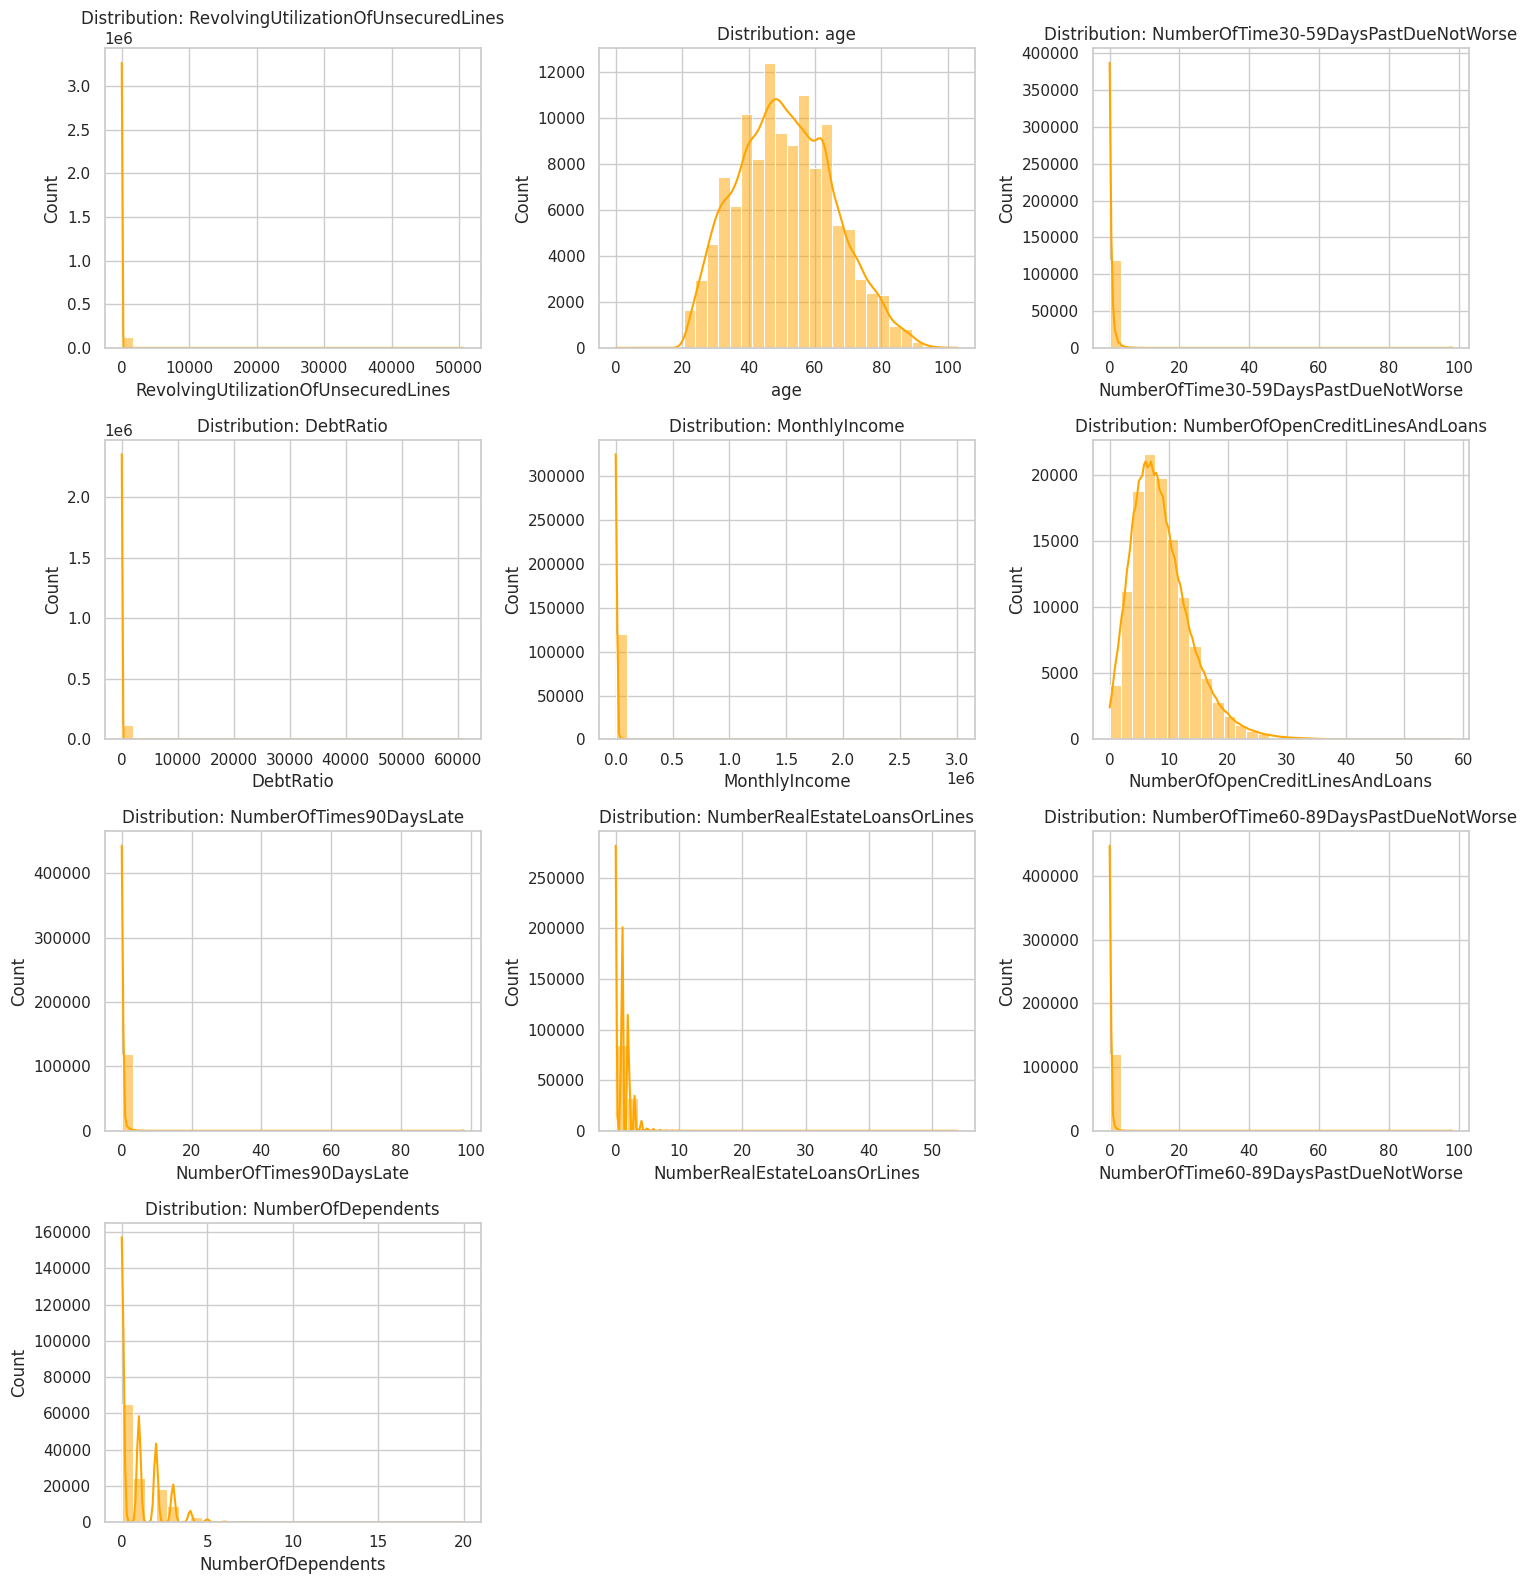

In [43]:
num_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
            'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
            'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
            'NumberOfDependents']
plot_histograms(df_dropna, num_cols, cols_per_row=3)

### Identify Skewed Columns

In [44]:
df_dropna[num_cols].skew().sort_values(ascending=False)

MonthlyIncome                           114.040318
RevolvingUtilizationOfUnsecuredLines    102.519812
DebtRatio                                72.870065
NumberOfTime60-89DaysPastDueNotWorse     28.055524
NumberOfTimes90DaysLate                  27.633986
NumberOfTime30-59DaysPastDueNotWorse     26.705137
NumberRealEstateLoansOrLines              3.623151
NumberOfDependents                        1.430360
NumberOfOpenCreditLinesAndLoans           1.222839
age                                       0.227899
dtype: float64

### Visual Confirmation (Boxplots)

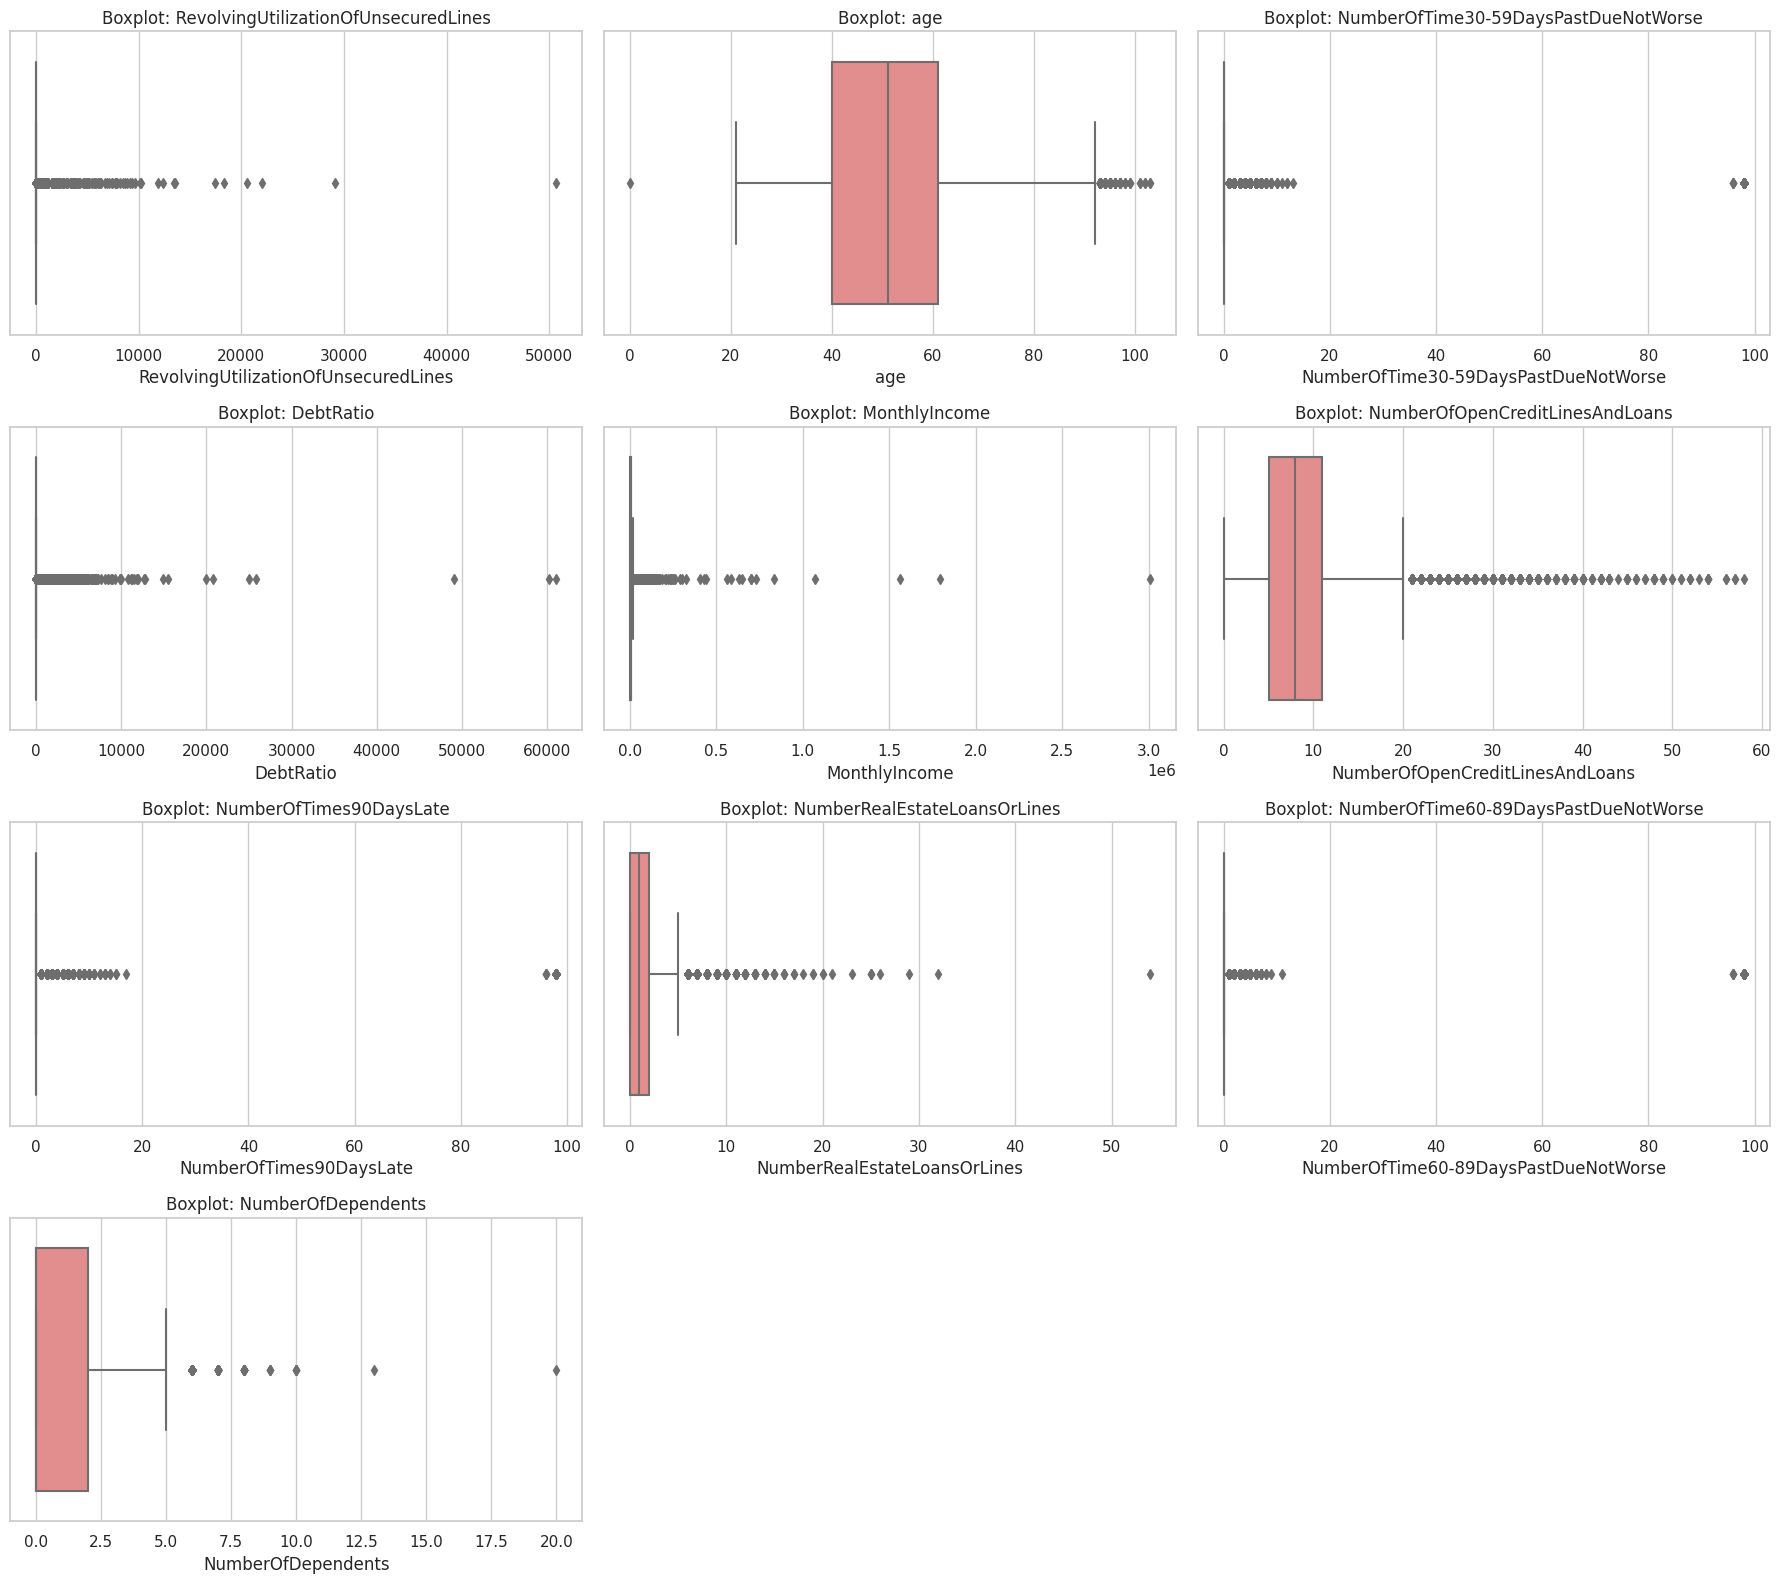

In [45]:
def boxplot_grid(cols, df):
    rows = (len(cols) + 2) // 3
    plt.figure(figsize=(18, 4*rows))
    for i, col in enumerate(cols):
        plt.subplot(rows, 3, i + 1)
        sns.boxplot(x=df[col], color='lightcoral')
        plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

boxplot_grid(num_cols, df_dropna)

### Interquartile Range (IQR) Proximity operation (Capping)

In [53]:
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        total = len(df_capped[col][df_capped[col] > upper]) + len(df_capped[col][df_capped[col] < lower])
        print(f'Total number of outliers in {col} was: {total}')
        df_capped[col] = np.where(df_capped[col] < lower, lower,
                                  np.where(df_capped[col] > upper, upper, df_capped[col]))
    return df_capped

# Apply
df_iqr_capped = cap_outliers_iqr(df_dropna, num_cols)

Total number of outliers in RevolvingUtilizationOfUnsecuredLines was: 543
Total number of outliers in age was: 118
Total number of outliers in NumberOfTime30-59DaysPastDueNotWorse was: 20299
Total number of outliers in DebtRatio was: 7358
Total number of outliers in MonthlyIncome was: 4879
Total number of outliers in NumberOfOpenCreditLinesAndLoans was: 3472
Total number of outliers in NumberOfTimes90DaysLate was: 6725
Total number of outliers in NumberRealEstateLoansOrLines was: 680
Total number of outliers in NumberOfTime60-89DaysPastDueNotWorse was: 6275
Total number of outliers in NumberOfDependents was: 232


In [54]:
df_iqr_capped.describe().T

,count,mean,std,min,25%,50%,75%,max
Default,120269.0,0.069486,0.254280,0.0,0.000000,0.000000,0.000000,1.000000
RevolvingUtilizationOfUnsecuredLines,120269.0,0.333228,0.354729,0.0,0.035084,0.177282,0.579428,1.395944
age,120269.0,51.287663,14.419817,8.5,40.000000,51.000000,61.000000,92.500000
NumberOfTime30-59DaysPastDueNotWorse,120269.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
DebtRatio,120269.0,0.347309,0.270852,0.0,0.143388,0.296023,0.482559,0.991317
MonthlyIncome,120269.0,6157.633251,3747.828434,0.0,3400.000000,5400.000000,8249.000000,15522.500000
NumberOfOpenCreditLinesAndLoans,120269.0,8.621033,4.729252,0.0,5.000000,8.000000,11.000000,20.000000
NumberOfTimes90DaysLate,120269.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
NumberRealEstateLoansOrLines,120269.0,1.037641,1.032307,0.0,0.000000,1.000000,2.000000,5.000000
NumberOfTime60-89DaysPastDueNotWorse,120269.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


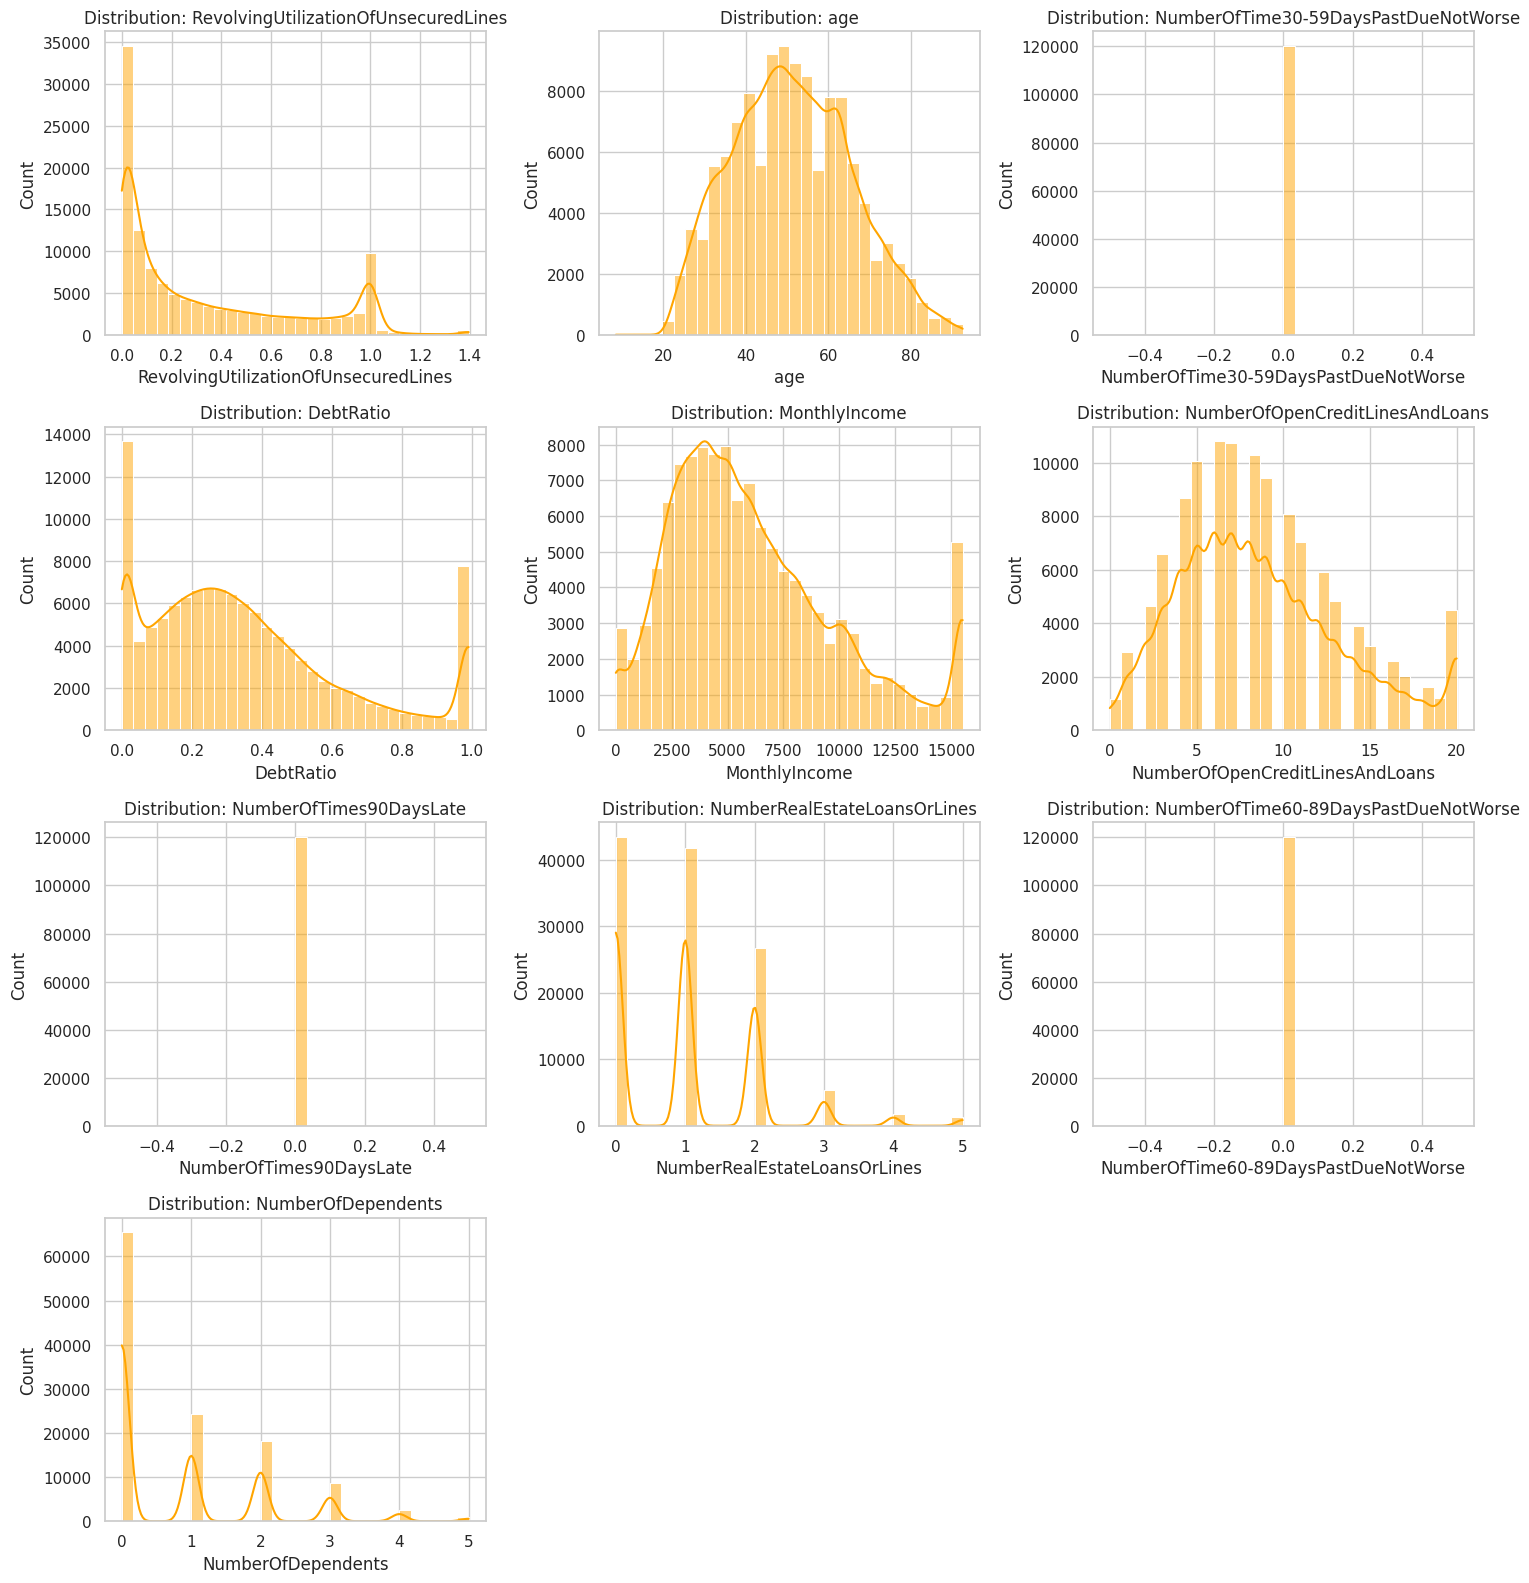

In [55]:
plot_histograms(df_iqr_capped, num_cols, cols_per_row=3)

Note: After applying the IQR proximity operation, the following columns —

NumberOfTime30-59DaysPastDueNotWorse

NumberOfTime60-89DaysPastDueNotWorse

NumberOfTimes90DaysLate —

ended up with almost all values being removed (or reduced to zero).

To retain their interpretability and preserve potentially meaningful patterns, we have excluded them from the IQR outlier treatment, allowing us to better assess their contribution to the model's predictive power.

In [56]:
num_cols_for_iqr = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
            'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
            'NumberRealEstateLoansOrLines',
            'NumberOfDependents']

In [57]:
df_iqr_capped = cap_outliers_iqr(df_dropna, num_cols_for_iqr)
df_iqr_capped

Total number of outliers in RevolvingUtilizationOfUnsecuredLines was: 543
Total number of outliers in age was: 118
Total number of outliers in DebtRatio was: 7358
Total number of outliers in MonthlyIncome was: 4879
Total number of outliers in NumberOfOpenCreditLinesAndLoans was: 3472
Total number of outliers in NumberRealEstateLoansOrLines was: 680
Total number of outliers in NumberOfDependents was: 232


,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2,0.802982,9120.0,13.0,0,5.0,0,2.0
1,0,0.957151,40.0,0,0.121876,2600.0,4.0,0,0.0,0,1.0
2,0,0.658180,38.0,1,0.085113,3042.0,2.0,1,0.0,0,0.0
3,0,0.233810,30.0,0,0.036050,3300.0,5.0,0,0.0,0,0.0
4,0,0.907239,49.0,1,0.024926,15522.5,7.0,0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50.0,0,0.404293,3400.0,7.0,0,0.0,0,0.0
149995,0,0.040674,74.0,0,0.225131,2100.0,4.0,0,1.0,0,0.0
149996,0,0.299745,44.0,0,0.716562,5584.0,4.0,0,1.0,0,2.0
149998,0,0.000000,30.0,0,0.000000,5716.0,4.0,0,0.0,0,0.0


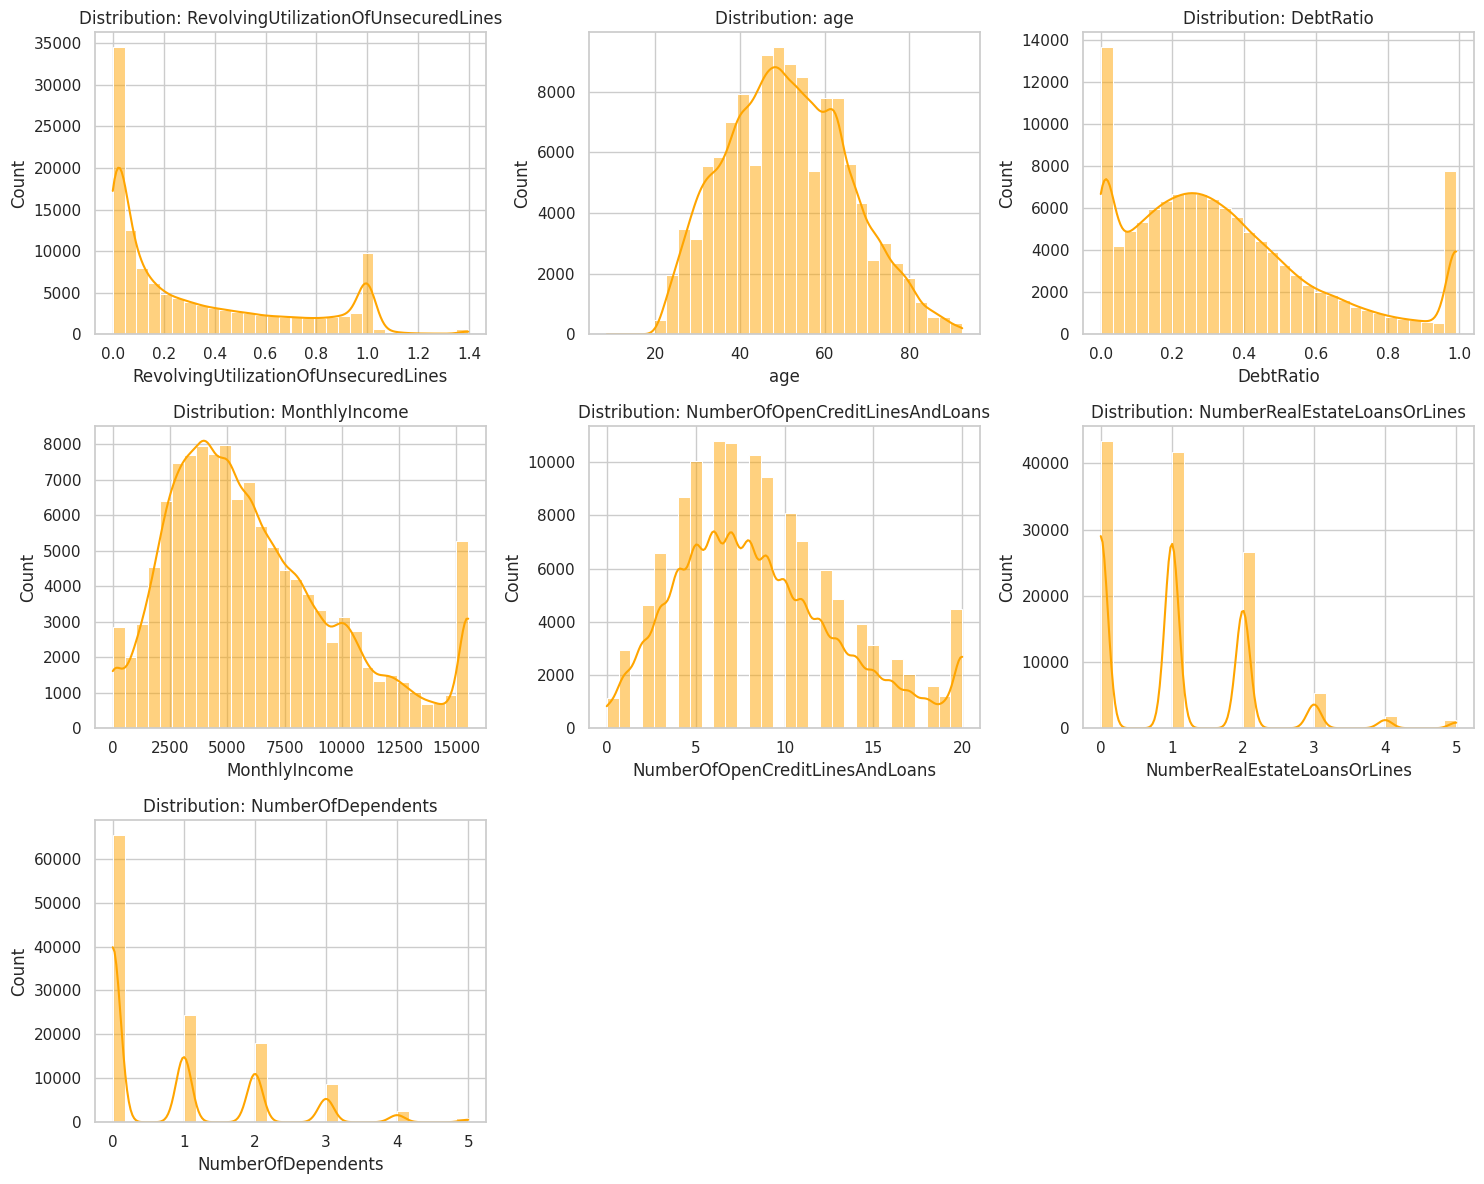

In [58]:
plot_histograms(df_iqr_capped, num_cols_for_iqr, cols_per_row=3)

## Bivariate Analysis — Feature vs Target

In [59]:
df = df_iqr_capped.copy()
features = num_cols

### BOX plot

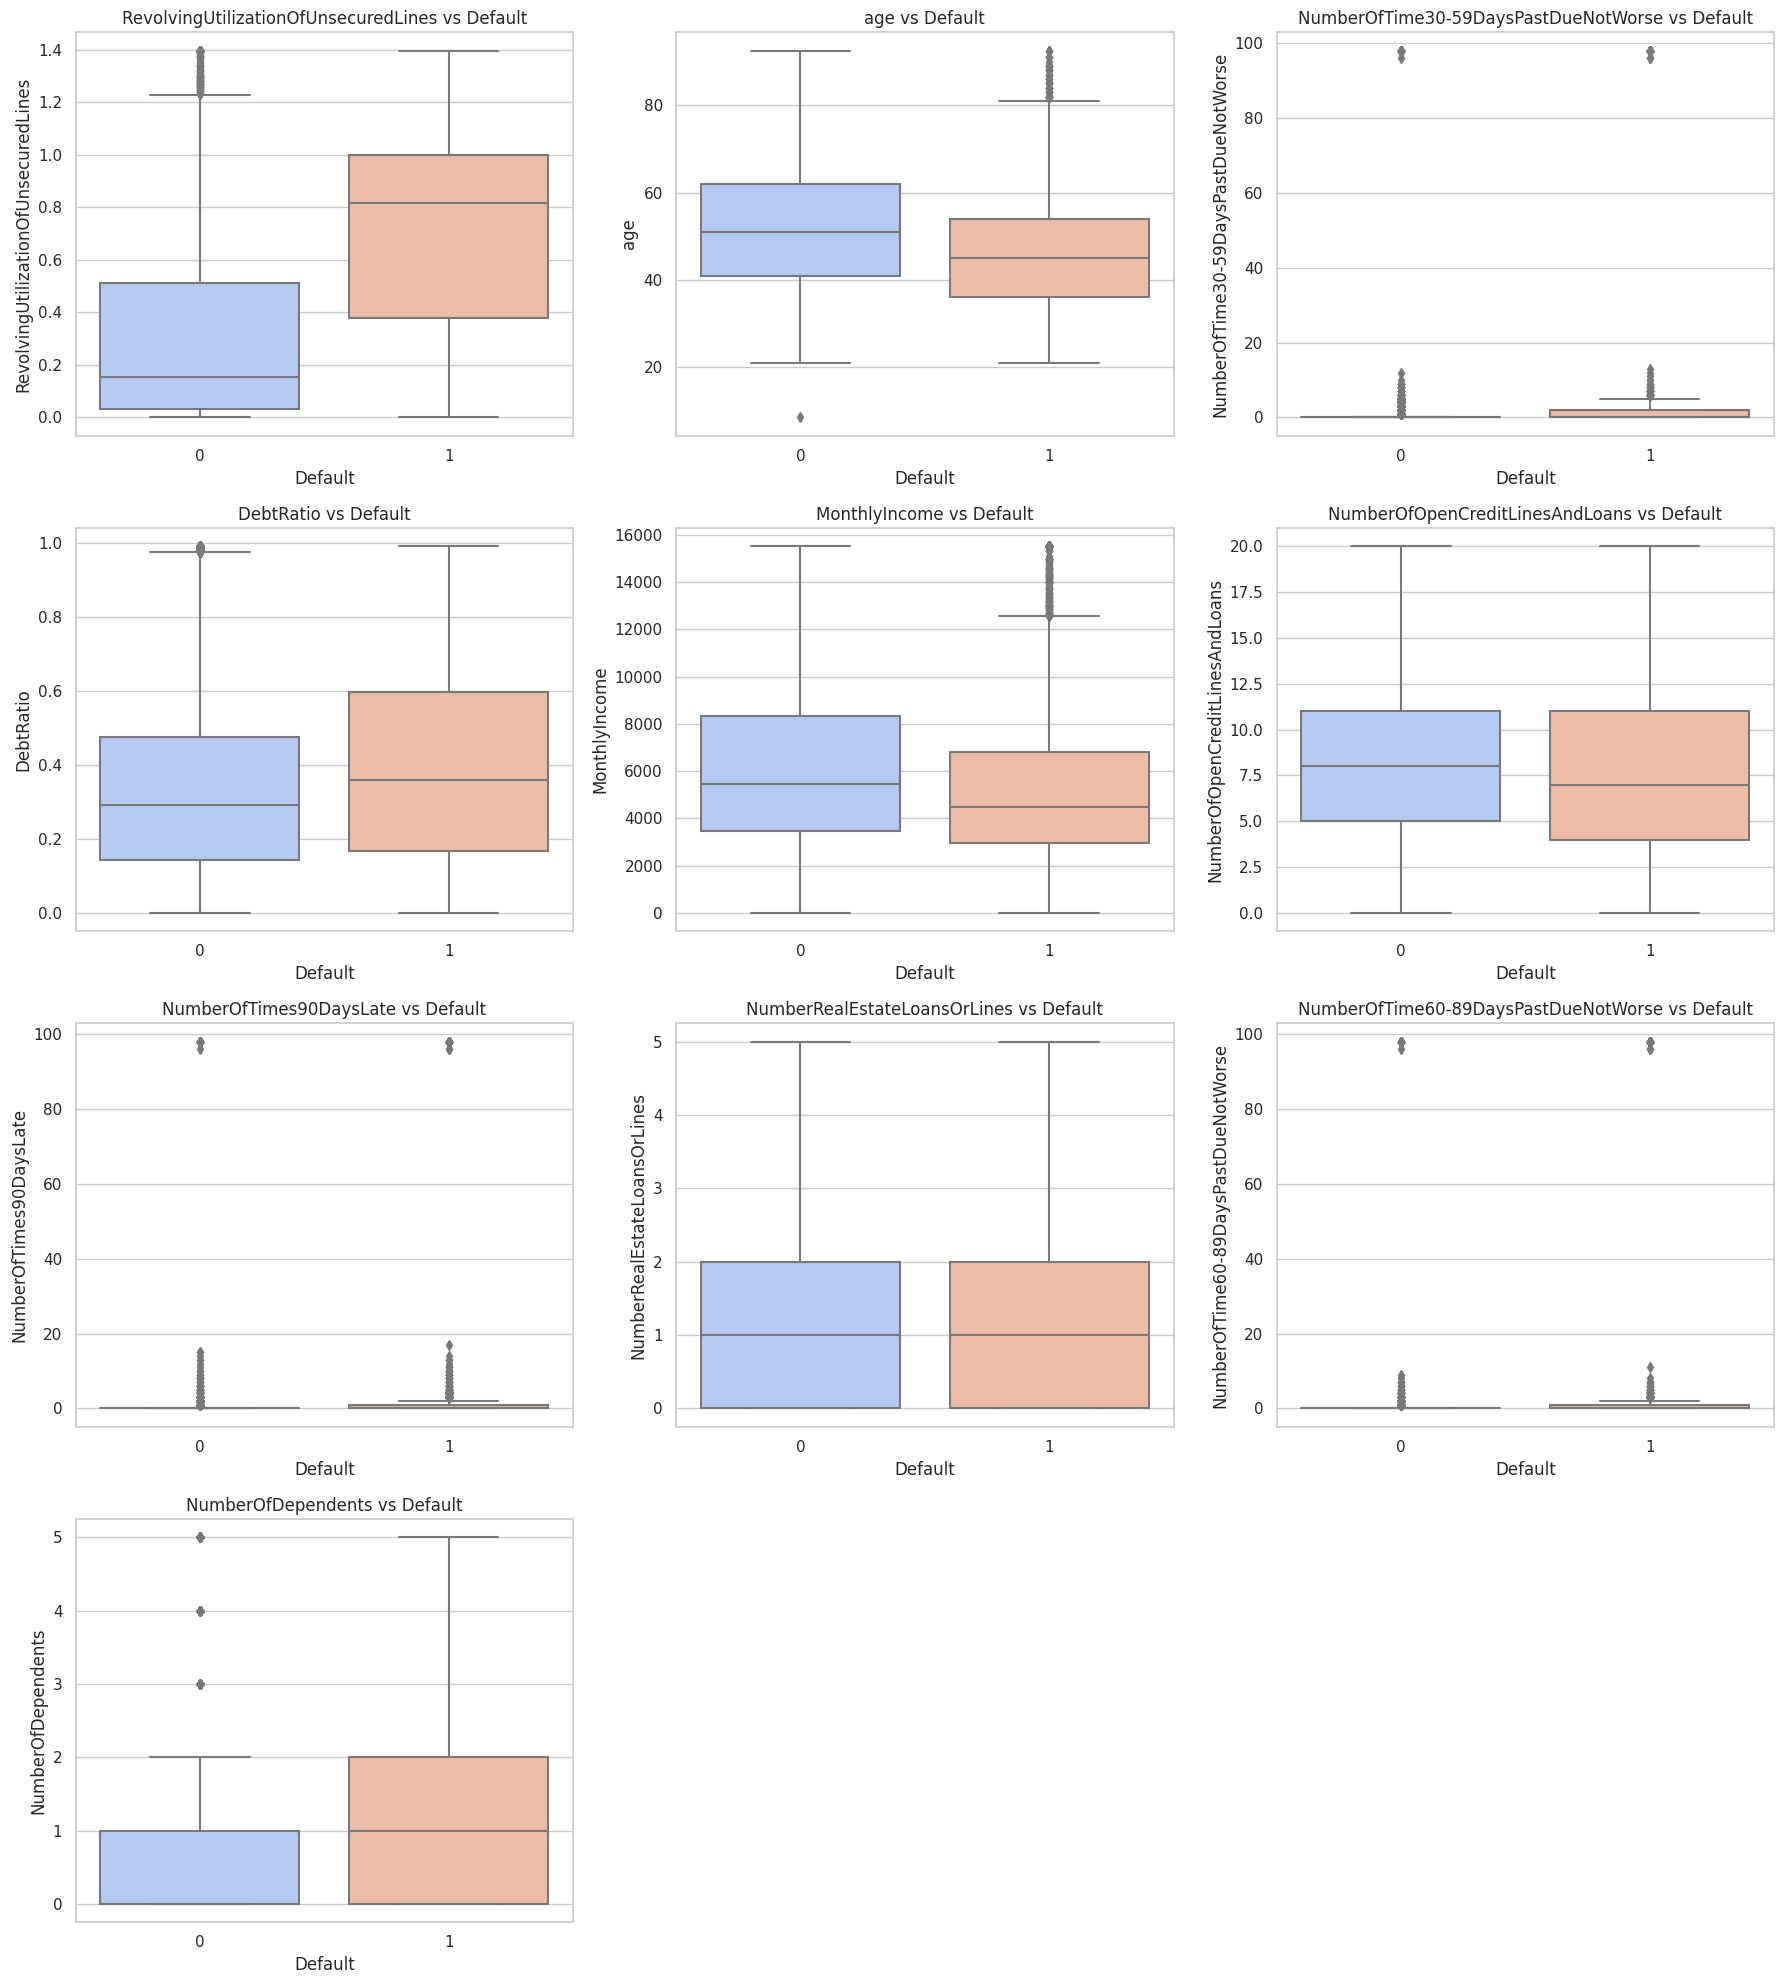

In [60]:
def plot_bivariate_boxplots(df, features, target='Default'):
    rows = (len(features) + 2) // 3
    plt.figure(figsize=(18, 5 * rows))
    
    for i, feature in enumerate(features):
        plt.subplot(rows, 3, i + 1)
        sns.boxplot(x=target, y=feature, data=df, palette='coolwarm')
        plt.title(f'{feature} vs {target}')
        plt.tight_layout()

plot_bivariate_boxplots(df, features)


### KDE plot

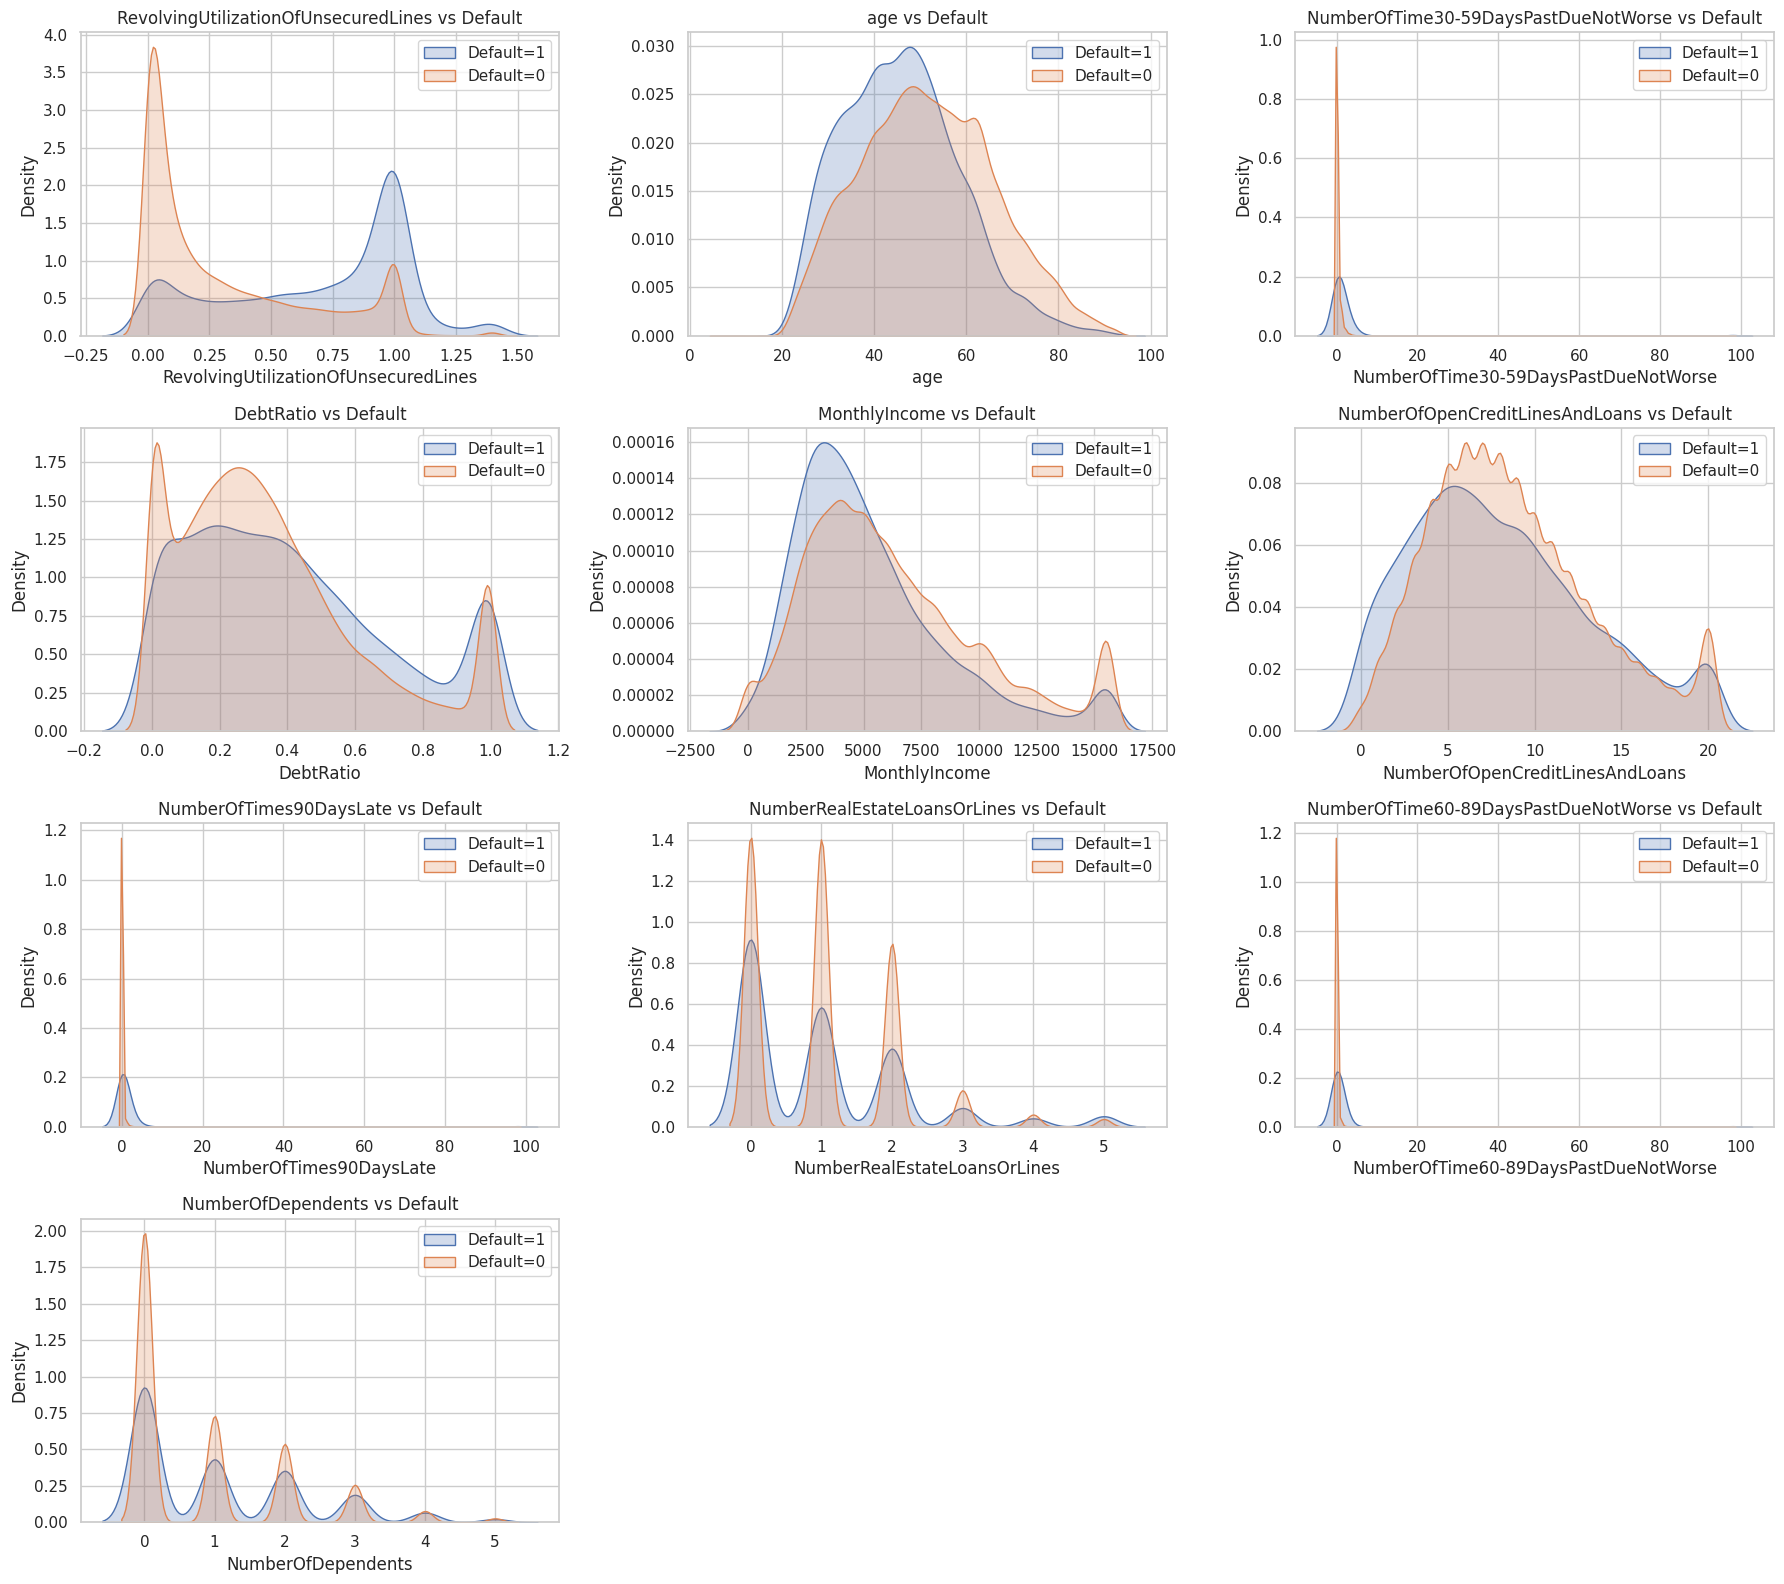

In [61]:
def plot_kde_bivariate(df, features, target='Default', rows=3, cols_per_row=3):
    total = len(features)
    cols = cols_per_row
    rows = (total + cols - 1) // cols
    
    plt.figure(figsize=(6 * cols, 4 * rows))

    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        for label in df[target].unique():
            sns.kdeplot(df[df[target] == label][col], label=f'{target}={label}', fill=True, common_norm=False)
        plt.title(f'{col} vs {target}')
        plt.legend()
        plt.tight_layout()

    plt.show()

plot_kde_bivariate(df=df, features=features)



### Insights: 

For "RevolvingUtilizationOfUnsecuredLines" column:

The column represents the percentage of credit limit that a borrower is using on their revolving credit accounts (like credit cards and lines of credit) relative to their total available revolving credit. It's calculated as:

RevolvingUtilizationOfUnsecuredLines = (Sum of credit limits on revolving credit / Total balance on revolving credit)

A higher value indicates that the borrower is using a larger portion of their available credit.


- Non-defaulters typically have much lower credit utilization (peak near 0).
- Defaulters show high utilization, often exceeding their credit limits (peak at/above 1).
- This feature is likely valuable for prediction due to the distinct distributions for each group.
- Mid-range utilization doesn't strongly distinguish between the groups.

------------------------------------------------------------------------------------------------------

For "DebtRatio" column:

The column represents the proportion of a borrower's total monthly debt payments (including mortgage, auto loans, etc.) to their total monthly gross income. It's calculated as:

DebtRatio = (Total monthly gross income / Total monthly debt payments)
 

A higher debt ratio indicates that a larger portion of the borrower's income is going towards debt payments.

- while both groups have a wide range of debt ratios, the density of defaulters (blue line) is notably higher at debt ratios approaching 1 compared to non-defaulters. This suggests that individuals with very high debt-to- income ratios are more likely to default.
- Conversely, the density of non-defaulters (orange line) is higher at lower debt ratios (around 0.1-0.2), indicating that individuals with less debt relative to their income are less likely to default.
- The overlap in the mid-range suggests that debt ratio alone isn't a perfect predictor in that zone.

------------------------------------------------------------------------------------------------------

For 'age' column: 

The column represents the age of the borrower in years.

- The density of defaulters (blue line) is noticeably higher in the younger age ranges (below approximately 30-35) compared to their density in older age ranges.
- Conversely, the density of non-defaulters (orange line) tends to be higher in the middle to older age ranges compared to the younger ages.
- Both groups have the highest density in the middle age range (30-60).
- This suggests that younger borrowers in this dataset might have a slightly higher propensity to default compared to older borrowers.


### Correlation with target

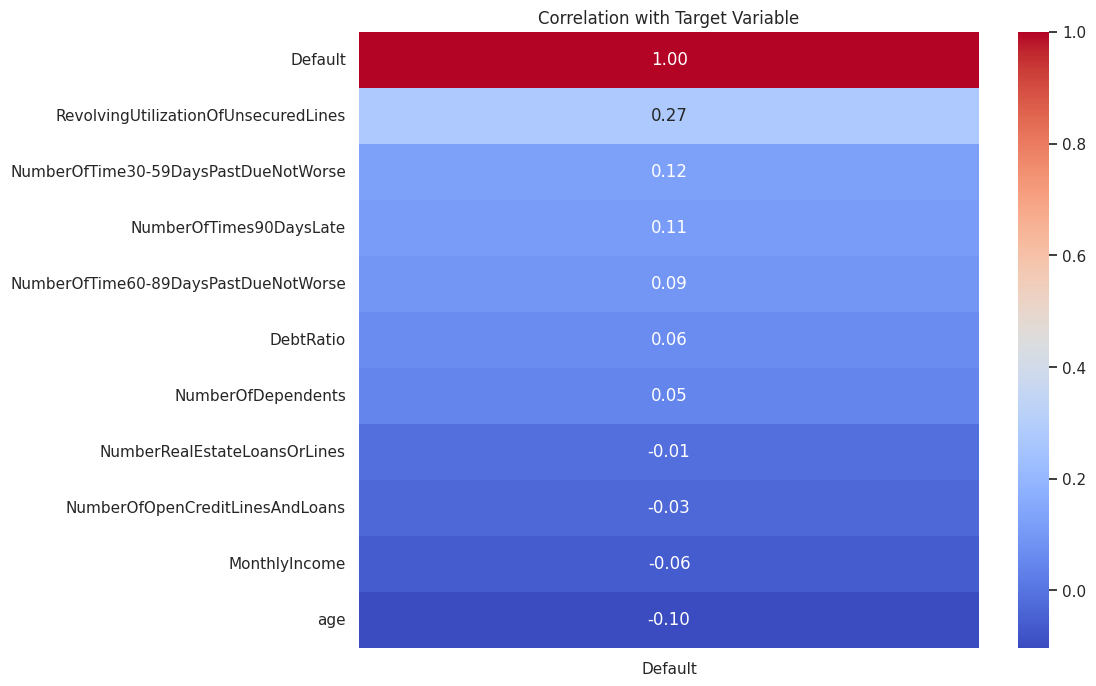

In [62]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['Default']].sort_values(by='Default', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Target Variable')
plt.show()


**Correlation with Default (Target Variable):**

* **RevolvingUtilizationOfUnsecuredLines (0.27):** Shows the strongest positive correlation with default. Higher utilization of credit lines is associated with a higher likelihood of default.
* **Number of Times Past Due (0.12, 0.11, 0.09):** The number of times a borrower has been past due on payments (in different timeframes) also shows a positive correlation with default, as expected. A history of payment issues increases the risk of future default.
* **DebtRatio (0.06) & NumberOfDependents (0.05):** These have weak positive correlations, suggesting a slight tendency for higher debt ratio and more dependents to be associated with a higher risk of default.
* **NumberRealEstateLoansOrLines (-0.01) & NumberOfOpenCreditLinesAndLoans (-0.03):** These show very weak negative correlations, suggesting a slight tendency for more real estate loans or open credit lines to be associated with a lower risk of default.
* **MonthlyIncome (-0.06) & age (-0.10):** These show weak negative correlations, indicating a slight tendency for higher income and older age to be associated with a lower risk of default.

**Key Takeaway:** Revolving credit utilization and past payment behavior appear to be the strongest indicators of default risk among these features.

### Pairplot with Hue 

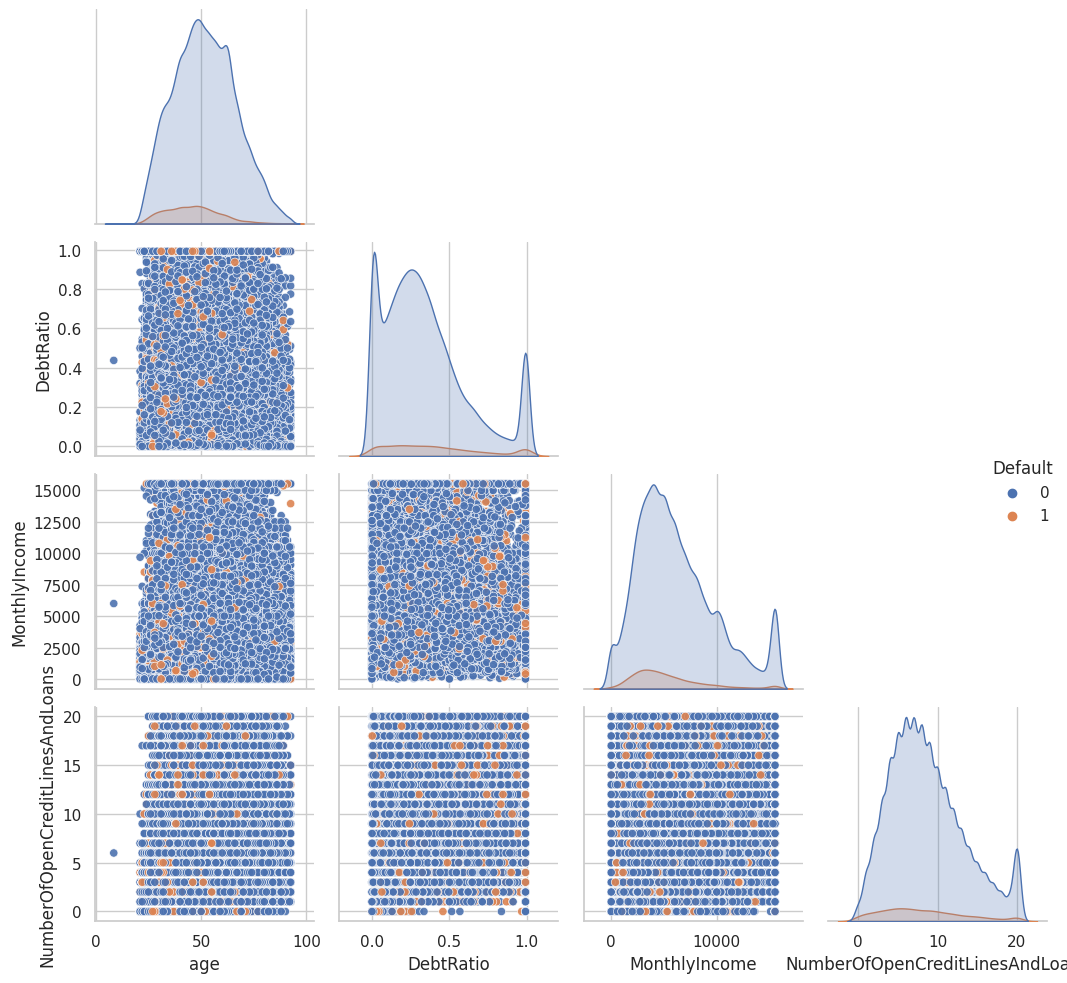

In [63]:
selected_cols = ['age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'Default']
sns.pairplot(df[selected_cols], hue='Default', corner=True, plot_kws={'alpha': 0.9})
plt.tight_layout()
plt.show()


### Pairplot Analysis Summary

- **Class Overlap:** There is significant overlap between defaulted and non-defaulted classes in all variable combinations, indicating poor class separability.
- **Non-Linearity:** Scatterplots reveal no strong linear patterns; relationships between features appear non-linear. Models capable of capturing non-linearity (e.g., Random Forest, XGBoost) are more suitable.
- **Skewed Distributions:** `MonthlyIncome` and `DebtRatio` show heavy right skew, suggesting the need for log or power transformations.


# Experiment 01 (Baseline)

This initial experiment establishes a baseline performance for our model. It involves a simplified approach to data cleaning and outlier handling.

**Key Steps:**

1.  **Missing Value Handling:** All rows containing any missing values were directly removed from both the training and testing datasets. This is a straightforward but potentially information-lossy method.
2.  **Outlier Handling (Training Data):** Outliers in a selected set of columns within the *training dataset only* were treated using the Interquartile Range (IQR) proximity rule. Values falling below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR) were capped at these respective thresholds. The testing dataset was *not* subjected to any outlier treatment in this baseline experiment to maintain its integrity as unseen data.

**Rationale:**

* Dropping missing value rows provides a clean dataset for initial model training but may discard valuable information if missingness is not completely random.
* Applying IQR-based outlier capping on the training data aims to reduce the influence of extreme values during model training, potentially leading to a more robust baseline model. Treating only the training data prevents data leakage from the test set into the outlier handling process.

In [5]:
# === Step 1: Load the training data ===
df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)  # Drop index column

# Rename target for readability
df.rename(columns={"SeriousDlqin2yrs": "Default"}, inplace=True)

df

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
# === Step 1: Drop all the rows having missing values ===
df_clean = df.dropna()

In [ ]:
# === Step 2: Separate features and target ===
X = df_clean.drop('Default', axis=1)
y = df_clean['Default']

## Train_test_split 

In [7]:
# === Step 3: Train-test split ===
# Perform 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")


X_train shape: (84188, 10)
X_test shape: (36081, 10)
y_train distribution:
Default
0    0.930513
1    0.069487
Name: proportion, dtype: float64
y_test distribution:
Default
0    0.930517
1    0.069483
Name: proportion, dtype: float64


In [8]:
# === Step 4: Apply IQR capping ===
def cap_outliers_with_train_iqr(X_train, X_test, columns):
    X_train_capped = X_train.copy()
    X_test_capped = X_test.copy()
    
    for col in columns:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        X_train_capped[col] = np.where(X_train_capped[col] < lower, lower,
                                       np.where(X_train_capped[col] > upper, upper, X_train_capped[col]))
        X_test_capped[col] = np.where(X_test_capped[col] < lower, lower,
                                      np.where(X_test_capped[col] > upper, upper, X_test_capped[col]))

    return X_train_capped, X_test_capped

In [9]:
# Select specific columns
num_cols_for_iqr = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
            'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
            'NumberRealEstateLoansOrLines',
            'NumberOfDependents']
# Apply
X_train, X_test = cap_outliers_with_train_iqr(X_train, X_test, num_cols_for_iqr)

In [11]:
# === Step 5: Define pipelines ===
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(verbose=-1, random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'ANN': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
    ])
}


In [12]:
from sklearn import set_config
set_config(display='diagram')
pipelines

{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  LogisticRegression(max_iter=1000, random_state=42))]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(random_state=42))]),
 'XGBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric='logloss',
                                feature_types=None, gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
          

In [13]:
def evaluate_models(pipelines, X_train, y_train, X_test, y_test):
    
    # Define metric functions
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
        'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
        'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
        'AUC-ROC': None  # Handled separately
    }

    results = {metric: {} for metric in metrics}

    # Binarize for ROC AUC
    lb = LabelBinarizer()
    lb.fit(y_train)

    for model_name, pipeline in pipelines.items():
        print(f'\n📌 Evaluating: {model_name}')
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Print accuracy and classification report
        print(f'🔍 Accuracy: {accuracy_score(y_test, y_pred):.2f}')
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f'{model_name} - Confusion Matrix')
        plt.grid(False)
        plt.show()

        # Standard metrics
        for metric_name, metric_func in metrics.items():
            if metric_name != 'AUC-ROC':
                results[metric_name][model_name] = metric_func(y_test, y_pred)

        # AUC-ROC (if applicable)
        if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
            y_proba = pipeline.predict_proba(X_test)
            y_test_bin = lb.transform(y_test)

            if y_proba.shape[1] == 2:
                auc = roc_auc_score(y_test_bin, y_proba[:, 1])
            else:
                auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')

            results['AUC-ROC'][model_name] = auc
        else:
            results['AUC-ROC'][model_name] = None
    
        print('----------------------------------------------------------------------------')
    
    return results



📌 Evaluating: Logistic Regression
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     33574
           1       0.56      0.05      0.10      2507

    accuracy                           0.93     36081
   macro avg       0.75      0.52      0.53     36081
weighted avg       0.91      0.93      0.90     36081



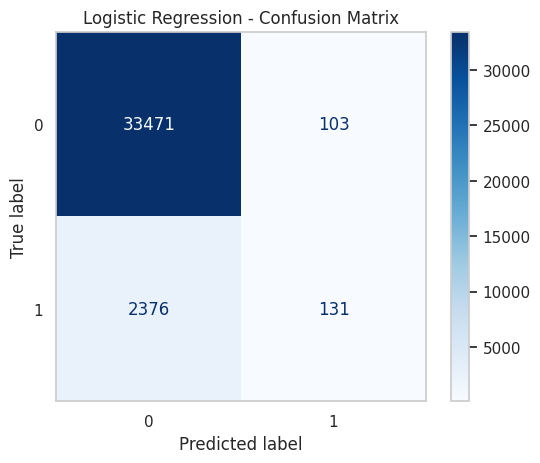

----------------------------------------------------------------------------

📌 Evaluating: Random Forest
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     33574
           1       0.55      0.18      0.27      2507

    accuracy                           0.93     36081
   macro avg       0.74      0.58      0.62     36081
weighted avg       0.91      0.93      0.92     36081



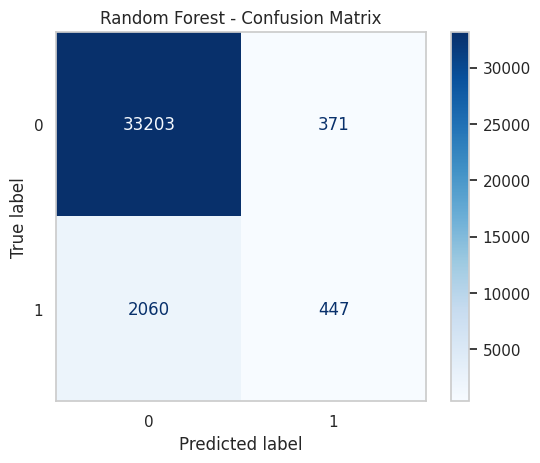

----------------------------------------------------------------------------

📌 Evaluating: XGBoost
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     33574
           1       0.53      0.20      0.29      2507

    accuracy                           0.93     36081
   macro avg       0.74      0.59      0.63     36081
weighted avg       0.91      0.93      0.92     36081



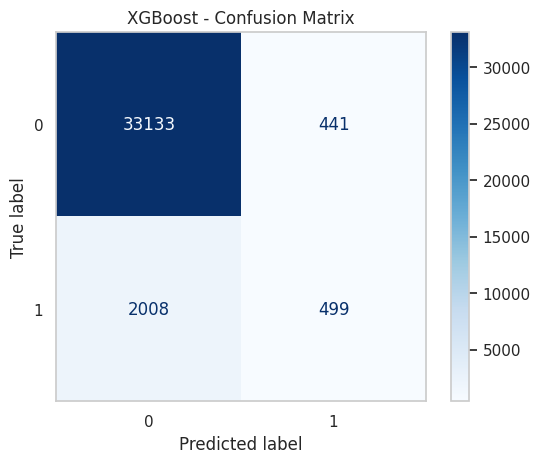

----------------------------------------------------------------------------

📌 Evaluating: LightGBM
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     33574
           1       0.57      0.18      0.27      2507

    accuracy                           0.93     36081
   macro avg       0.75      0.58      0.62     36081
weighted avg       0.92      0.93      0.92     36081



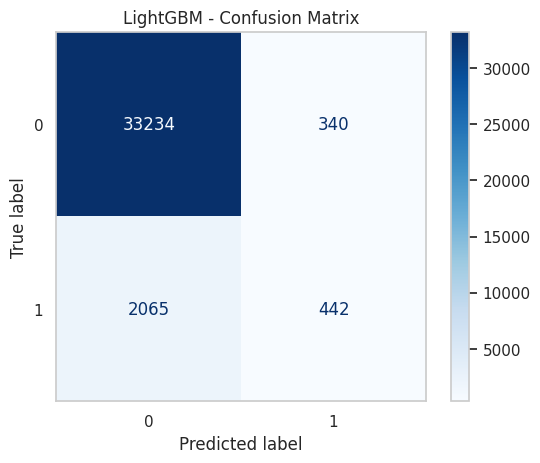

----------------------------------------------------------------------------

📌 Evaluating: AdaBoost
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     33574
           1       0.56      0.21      0.30      2507

    accuracy                           0.93     36081
   macro avg       0.75      0.60      0.63     36081
weighted avg       0.92      0.93      0.92     36081



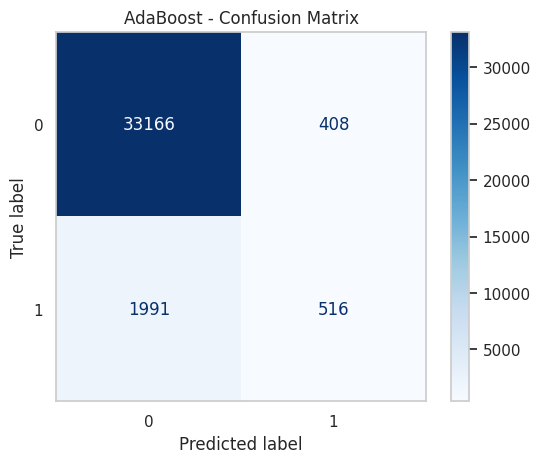

----------------------------------------------------------------------------

📌 Evaluating: ANN
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     33574
           1       0.55      0.18      0.27      2507

    accuracy                           0.93     36081
   macro avg       0.75      0.58      0.62     36081
weighted avg       0.91      0.93      0.92     36081



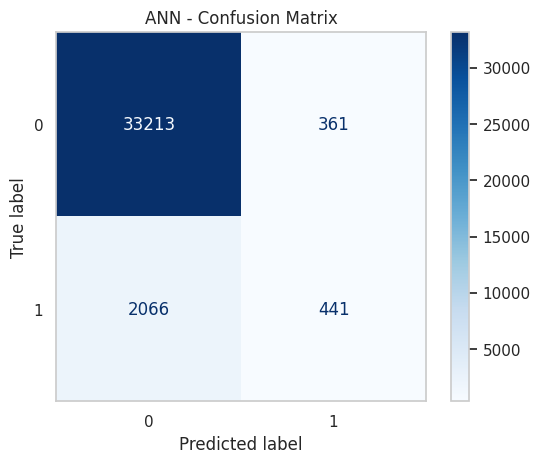

----------------------------------------------------------------------------


In [14]:
results = evaluate_models(pipelines, X_train, y_train, X_test, y_test)

In [15]:
results_df = pd.DataFrame(results)
results_df = results_df.T 
results_df.round(3)

,Logistic Regression,Random Forest,XGBoost,LightGBM,AdaBoost,ANN
Accuracy,0.931,0.933,0.932,0.933,0.934,0.933
Precision,0.747,0.744,0.737,0.753,0.751,0.746
Recall,0.525,0.584,0.593,0.583,0.597,0.583
F1 Score,0.530,0.617,0.627,0.617,0.633,0.616
AUC-ROC,0.792,0.825,0.843,0.852,0.848,0.852


## Experiment 02 (Handling Imbalance and Imputation)

This experiment builds upon the baseline by addressing missing values with imputation and tackling class imbalance using SMOTE. Outlier handling remains consistent with the previous experiment.

**Key Steps:**

1.  **Missing Value Handling:** Missing values in both the training and testing datasets were imputed using the K-Nearest Neighbors (KNN) Imputer. This method estimates missing values based on the values of their nearest neighbors in the feature space, aiming to preserve more information than simply dropping rows. The KNN Imputer was fitted on the training data and then used to transform both the training and testing sets.
2.  **Outlier Handling (Training Data):** Similar to Experiment 01, outliers in a selected set of columns within the *training dataset only* were treated using the Interquartile Range (IQR) proximity rule. Values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR) were capped at these respective thresholds. The capping thresholds were derived solely from the training data. The testing dataset was not subjected to outlier treatment.
3.  **Class Imbalance Handling (Training Data):** To address the potential issue of class imbalance in the binary classification task, the Synthetic Minority Over-sampling Technique (SMOTE) was applied to the *training data only*. SMOTE generates synthetic samples for the minority class by interpolating between existing minority instances. This aims to provide a more balanced representation of both classes during model training. The testing dataset was not oversampled.

**Rationale:**

* **KNN Imputation:** By imputing missing values, we aim to retain more of the original data and potentially improve model performance compared to simply dropping rows with missing values, especially if missingness patterns are informative. Using KNN imputation leverages the relationships between features to make informed estimations. Fitting the imputer only on the training data prevents data leakage.
* **IQR Outlier Capping (Training Data):** This step, consistent with the baseline, aims to limit the impact of extreme values on the training process, promoting model robustness without discarding potentially valuable data points. Using thresholds from the training set ensures no information from the test set influences this process.
* **SMOTE for Class Imbalance (Training Data):** Addressing class imbalance is crucial for training models that can effectively predict both the majority and minority classes. SMOTE is a widely used technique to balance the class distribution in the training data, allowing the model to learn more effectively from the minority class without simply duplicating existing samples. Applying SMOTE only to the training data is essential to prevent synthetic data from influencing the evaluation on the unseen test set.

In [16]:
# Load the train dataset
df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)  # Drop index column

# Rename target for readability
df.rename(columns={"SeriousDlqin2yrs": "Default"}, inplace=True)

df

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [17]:
# === Step 1: Load and copy the training data ===
df_original = df.copy()  # assuming df is the raw dataset with missing values

# === Step 2: Separate features and target ===
X = df_original.drop(columns='Default')
y = df_original['Default']

In [18]:
# === Step 3: Apply KNN Imputer ===
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [21]:
# === Step 4: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
# === Step 5: Apply IQR capping ===
X_train, X_test = cap_outliers_with_train_iqr(X_train, X_test, num_cols_for_iqr)

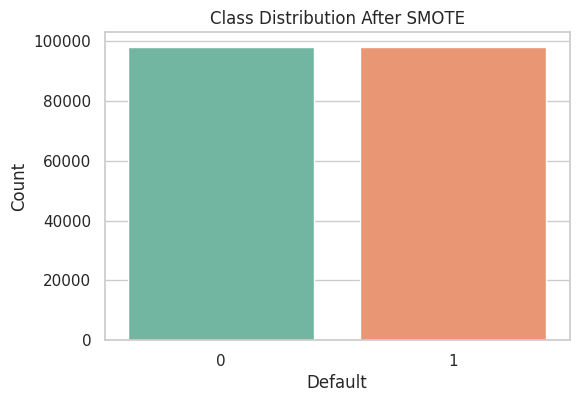

In [23]:
# === Step 6: Apply SMOTE on training data ===
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

In [24]:
# === Step 7: Define pipelines ===
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(verbose=-1, random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'ANN': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
    ])
}



📌 Evaluating: Logistic Regression
🔍 Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     41992
           1       0.18      0.73      0.29      3008

    accuracy                           0.76     45000
   macro avg       0.58      0.75      0.58     45000
weighted avg       0.92      0.76      0.82     45000



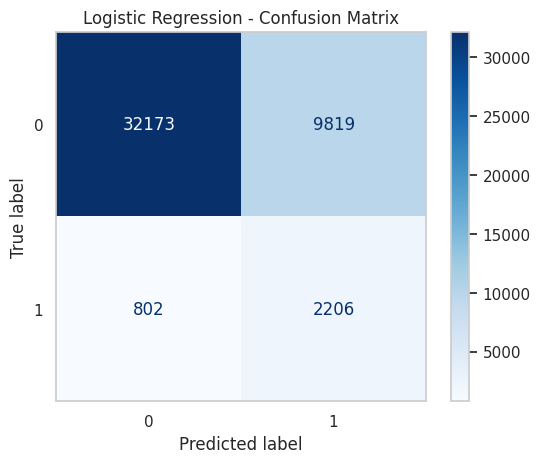

----------------------------------------------------------------------------

📌 Evaluating: Random Forest
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     41992
           1       0.49      0.24      0.32      3008

    accuracy                           0.93     45000
   macro avg       0.72      0.61      0.64     45000
weighted avg       0.92      0.93      0.92     45000



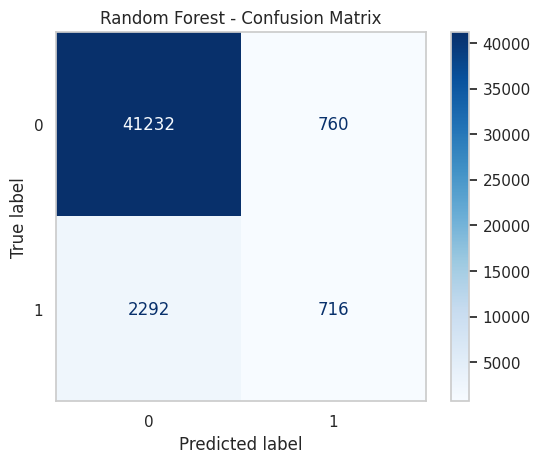

----------------------------------------------------------------------------

📌 Evaluating: XGBoost
🔍 Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41992
           1       0.53      0.21      0.30      3008

    accuracy                           0.93     45000
   macro avg       0.74      0.60      0.64     45000
weighted avg       0.92      0.93      0.92     45000



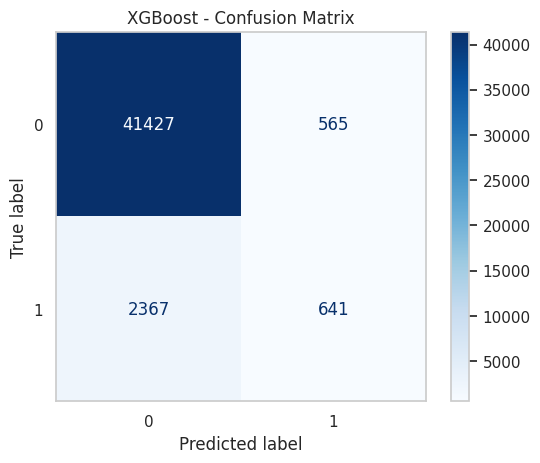

----------------------------------------------------------------------------

📌 Evaluating: LightGBM
🔍 Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41992
           1       0.54      0.24      0.33      3008

    accuracy                           0.94     45000
   macro avg       0.74      0.61      0.65     45000
weighted avg       0.92      0.94      0.92     45000



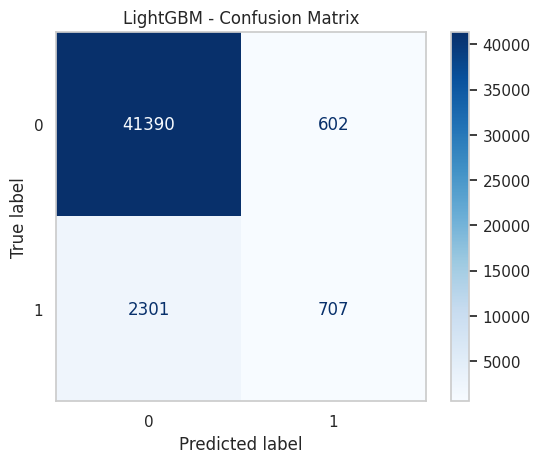

----------------------------------------------------------------------------

📌 Evaluating: AdaBoost
🔍 Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     41992
           1       0.39      0.45      0.42      3008

    accuracy                           0.92     45000
   macro avg       0.68      0.70      0.69     45000
weighted avg       0.92      0.92      0.92     45000



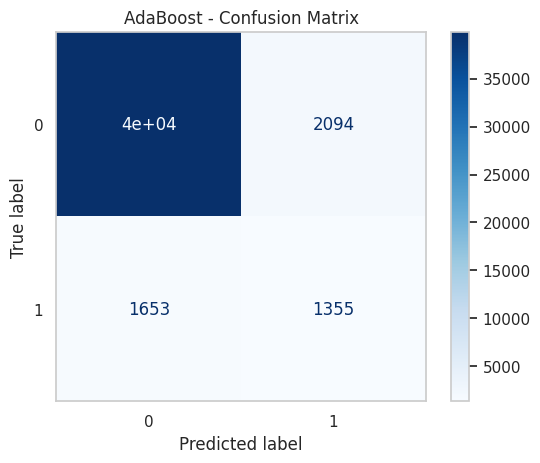

----------------------------------------------------------------------------

📌 Evaluating: ANN
🔍 Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     41992
           1       0.35      0.46      0.40      3008

    accuracy                           0.91     45000
   macro avg       0.65      0.70      0.67     45000
weighted avg       0.92      0.91      0.91     45000



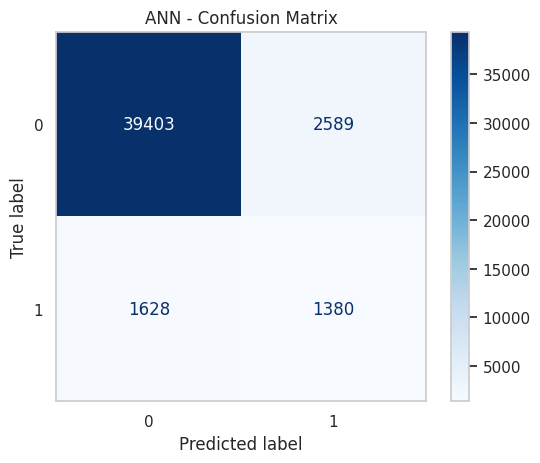

----------------------------------------------------------------------------


In [25]:
results = evaluate_models(pipelines, X_train_resampled, y_train_resampled, X_test, y_test)

In [27]:
results_df_experiment_2 = pd.DataFrame(results)
results_df_experiment_2 = results_df_experiment_2.T 
results_df_experiment_2.round(3)

,Logistic Regression,Random Forest,XGBoost,LightGBM,AdaBoost,ANN
Accuracy,0.764,0.932,0.935,0.935,0.917,0.906
Precision,0.580,0.716,0.739,0.744,0.677,0.654
Recall,0.750,0.610,0.600,0.610,0.700,0.699
F1 Score,0.576,0.642,0.635,0.647,0.687,0.672
AUC-ROC,0.829,0.833,0.854,0.861,0.842,0.836
